In [11]:
## Ref: https://stackoverflow.com/questions/59843149/how-to-read-frames-using-pyqt-and-opencv
## Ref: https://www.geeksforgeeks.org/pyqt5-toggle-button/

In [1]:
import sys
from PyQt5.QtCore import Qt, QSize, QTimer, QThread
from PyQt5.QtWidgets import QApplication, QWidget, QGridLayout, QLabel, QPushButton
from PyQt5.QtGui import QPixmap, QImage, QFont
import cv2
import time
import numpy as np
import faceTrack

In [2]:
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [3]:
def main(video_path):    
    app = QApplication([])
    
    window = QWidget()
    window.setWindowTitle('OpenCV Testing')
    window.setLayout(QGridLayout(window))    
    window.setMinimumSize(QSize(640, 480))

    text_label = QLabel()
    text_label.setText("              OpenCV Testing with PyQt")
    text_label.setFont(QFont('Arial', 15))
    #text_label.setAlignment(Qt.AlignCenter)
    window.layout().addWidget(text_label, 1, 2, 1, 3)
    
    button_canny = QPushButton("Canny")
    button_canny.setCheckable(True)
    button_canny.clicked.connect(lambda: check_canny(button_canny))
    window.layout().addWidget(button_canny, 3, 1, 1, 1)
    
    button_facetrack = QPushButton("Face Track")
    button_facetrack.setCheckable(True)
    button_facetrack.clicked.connect(lambda: check_facetrack(button_facetrack))
    window.layout().addWidget(button_facetrack, 3, 1, 2, 1)
    
    video_label = QLabel()
    window.layout().addWidget(video_label, 3, 2, 1, 2)
    
    space_label = QLabel()
    space_label.setText("")
    space_label.setAlignment(Qt.AlignCenter)
    window.layout().addWidget(space_label, 2, 2)
    window.layout().addWidget(space_label, 4, 2)
    
    window.show()

    vc = cv2.VideoCapture(video_path)
    fps = vc.get(cv2.CAP_PROP_FPS)
    vc.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

    timer = QTimer()
    timer.timeout.connect(lambda: nextFrameSlot(vc, video_label, canny, face_track))
    
    if not face_track:
        timer.start(1000. / fps)
        
    if face_track:
        timer.start(0)

    return app.exit(app.exec_())

In [4]:
def check_canny(button):
    
    global canny
    
    if button.isChecked():
        canny = True
        # setting background color to light-blue
        button.setStyleSheet("background-color : lightblue")
  
    # if it is unchecked
    else:
        canny = False
        # set background color back to light-grey
        button.setStyleSheet("background-color : lightgrey")

    return canny

In [5]:
def check_facetrack(button):
    
    global face_track
    
    if button.isChecked():
        face_track = True
        # setting background color to light-blue
        button.setStyleSheet("background-color : lightblue")
  
    # if it is unchecked
    else:
        face_track = False
        # set background color back to light-grey
        button.setStyleSheet("background-color : lightgrey")

    return face_track

In [26]:
def nextFrameSlot(vc: cv2.VideoCapture, label: QLabel, canny, face_track):
    rval, frame = vc.read()
    
    global net
    
    if rval:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (400,300))
        
        if (not canny) & (face_track):
            frame, _, _ = faceTrack.caffe_detect(frame, net, des_threshold=0.35)
        
        if canny:
            frame_canny = OpCV_Utils.custom_canny(frame, canny_thresh = (100,100), order = 1, dil_level = 0, ero_level = 0)
            frame = cv2.cvtColor(frame_canny, cv2.COLOR_GRAY2BGR)
            
    else:
        frame = np.zeros((300,400,3))
        
    image = QImage(frame, frame.shape[1], frame.shape[0], QImage.Format_RGB888)
        
    pixmap = QPixmap.fromImage(image)
    label.setPixmap(pixmap)

In [ ]:
if __name__ == '__main__':
    canny = False
    face_track = False
    # Get Net Architecture Weights and Configuration:
    caffe_proto = 'C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Caffe Face Tracking/' + 'deploy.prototxt.txt'
    caffe_model = 'C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Caffe Face Tracking/' + 'res10_300x300_ssd_iter_140000.caffemodel'
    net = faceTrack.caffe_config_net(caffe_proto, caffe_model)
    video_path = 'C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Testing Grounds/ztest_media/people.mp4'
    exit_code = main(video_path)
    sys.exit(exit_code)

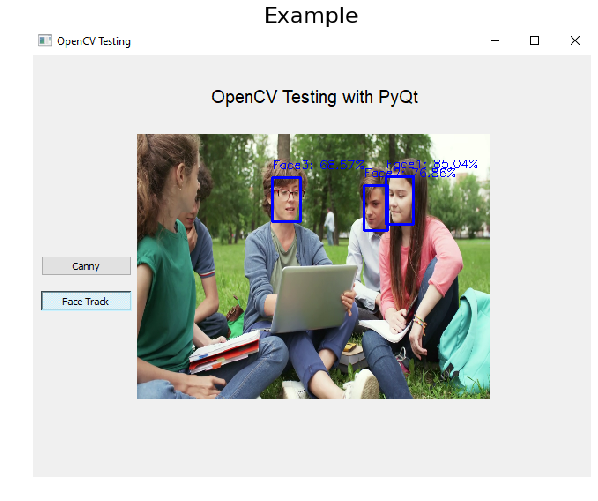

In [43]:
img = cv2.imread('Window Example.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_single_image_plt(img, 'Example', fig_size=(10,10))